### Colorado Motor Vehicle Sales

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 01 2024

In [157]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [159]:
df = pd.read_csv("C:/Users/abu_s/Desktop/Data/json/colorado_motor_vehicle_sales.csv", encoding='latin1')

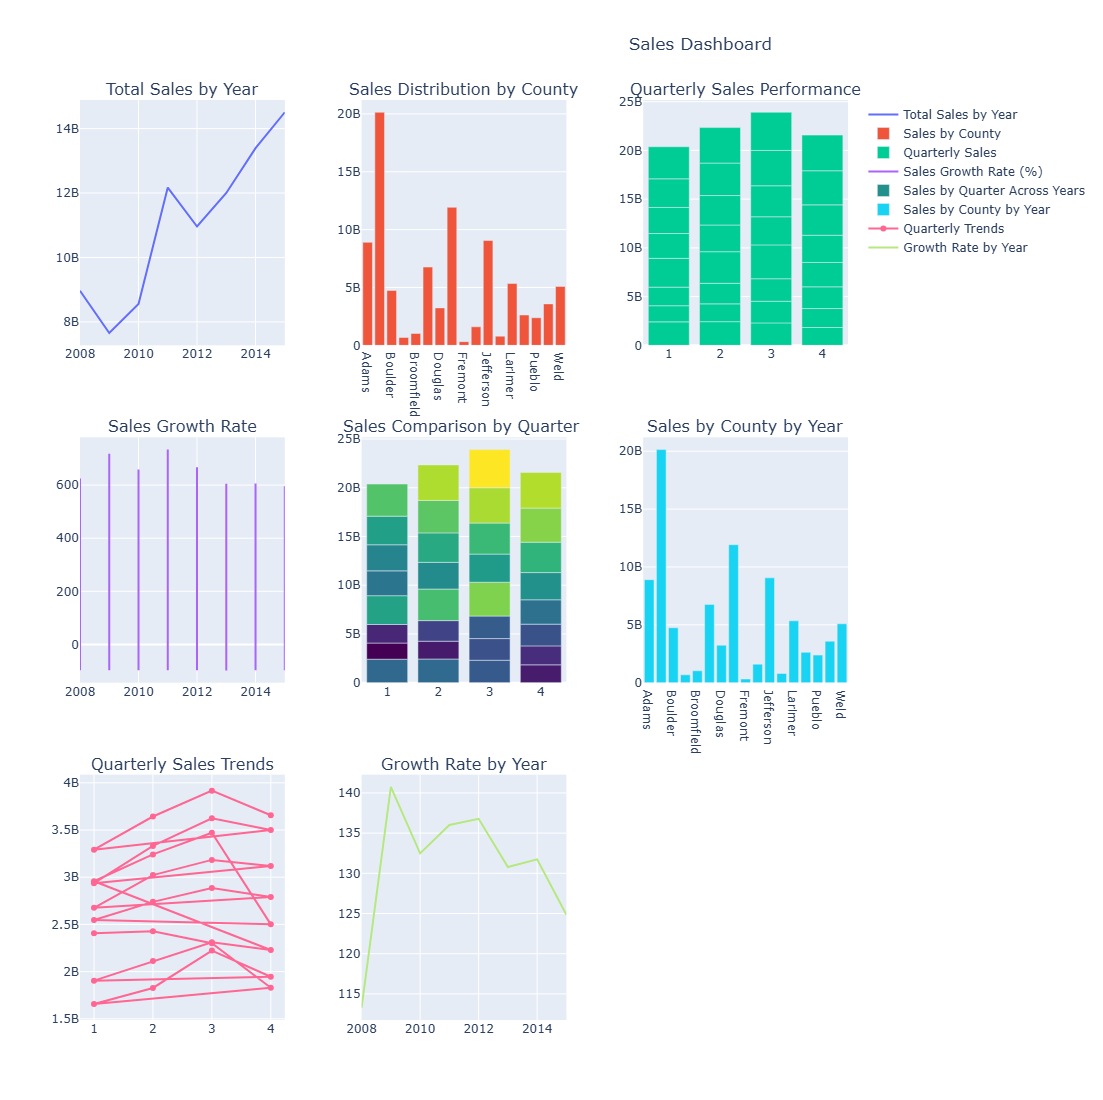

In [169]:
# Create subplots
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        "Total Sales by Year", "Sales Distribution by County", "Quarterly Sales Performance",
        "Sales Growth Rate", "Sales Comparison by Quarter ", 
        "Sales by County by Year", "Quarterly Sales Trends", "Growth Rate by Year"
    ),
    row_heights=[2.9, 2.9, 2.9],  # Adjust row heights for better layout
    vertical_spacing=0.1,
    horizontal_spacing=0.1
)

# 1. Total Sales by Year (Line chart)
total_sales_by_year = df.groupby('year')['sales'].sum().reset_index()
fig.add_trace(
    go.Scatter(x=total_sales_by_year['year'], y=total_sales_by_year['sales'], mode='lines', name="Total Sales by Year"),
    row=1, col=1
)

# 2. Sales Distribution by County (Bar chart)
sales_by_county = df.groupby('county')['sales'].sum().reset_index()
fig.add_trace(
    go.Bar(x=sales_by_county['county'], y=sales_by_county['sales'], name="Sales by County"),
    row=1, col=2
)

# 3. Quarterly Sales Performance (Bar chart)
quarterly_sales = df.groupby(['year', 'quarter'])['sales'].sum().reset_index()
fig.add_trace(
    go.Bar(x=quarterly_sales['quarter'], y=quarterly_sales['sales'], name="Quarterly Sales"),
    row=1, col=3
)

# 4. Sales Growth Rate (Line chart)
df['growth_rate'] = df.groupby('year')['sales'].pct_change() * 100
fig.add_trace(
    go.Scatter(x=df['year'], y=df['growth_rate'], mode='lines', name="Sales Growth Rate (%)"),
    row=2, col=1
)

# 5. Sales Comparison by Quarter Across Years (Bar chart)
fig.add_trace(
    go.Bar(
        x=quarterly_sales['quarter'], 
        y=quarterly_sales['sales'],
        name="Sales by Quarter Across Years",
        marker=dict(color=quarterly_sales['sales'], colorscale='Viridis')
    ),
    row=2, col=2
)

# 6. Sales by County by Year (Bar chart)
fig.add_trace(
    go.Bar(x=sales_by_county['county'], y=sales_by_county['sales'], name="Sales by County by Year"),
    row=2, col=3
)

# 7. Quarterly Sales Trends (Line chart)
fig.add_trace(
    go.Scatter(x=quarterly_sales['quarter'], y=quarterly_sales['sales'], mode='lines+markers', name="Quarterly Trends"),
    row=3, col=1
)

# 8. Growth Rate by Year (Line chart)
growth_rate_by_year = df.groupby('year')['growth_rate'].mean().reset_index()
fig.add_trace(
    go.Scatter(x=growth_rate_by_year['year'], y=growth_rate_by_year['growth_rate'], mode='lines', name="Growth Rate by Year"),
    row=3, col=2
)

# Update layout to increase chart size
fig.update_layout(
    title_text="Sales Dashboard",
    showlegend=True,
    width=1100,  # Increase width
    height=1100,  # Increase height
    title_x=0.7  # Center the title
)

# Show the dashboard
fig.show()